In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cvx.covariance.ewma import iterated_ewma, _ewma_mean, _ewma_cov
from cvx.covariance.combination import from_sigmas
from cvx.covariance.regularization import regularize_covariance, em_regularize_covariance
from experiments.utils.experiment_utils import *
from experiments.utils.factor_model import *

sns.set()
sns.set(font_scale=1.5)

%load_ext autoreload
%autoreload 2

In [44]:
returns = pd.read_csv(
    "../data/49_industries.csv", index_col=0, header=0, parse_dates=True
)

In [40]:
iewma_pair = (63, 125)
iewma = list(
    iterated_ewma(
        returns,
        vola_halflife=iewma_pair[0],
        cov_halflife=iewma_pair[1],
        min_periods_vola=0,
        min_periods_cov=0,
        nan_to_num=True,
    )
)
iewma = {iterate.time: iterate.covariance for iterate in iewma}

covariance = iewma[returns.index[-1]]

In [52]:
iewma_pair = (63, 125)


In [184]:
# 10 percent random nans

np.random.seed(0)
mask = np.random.choice([True, False], size=returns.iloc[:5000].shape, p=[0.1, 0.9])

returns_nans = returns.copy()
# returns_nans.iloc[:5000][mask] = np.nan
returns_nans.iloc[:5000, 0] = np.nan


In [53]:
times = returns_nans.index

In [194]:
iewma = list(
    iterated_ewma(
        returns,
        vola_halflife=iewma_pair[0],
        cov_halflife=iewma_pair[1],
        min_periods_vola=0,
        min_periods_cov=0,
        nan_to_num=True,
    )
)
iewma = {iterate.time: iterate.covariance for iterate in iewma}


In [196]:
iewma_nans = list(
    iterated_ewma(
        returns_nans,
        vola_halflife=iewma_pair[0],
        cov_halflife=iewma_pair[1],
        min_periods_vola=0,
        min_periods_cov=0,
        nan_to_num=True,
        mean=False,
    )
)
iewma_nans = {iterate.time: iterate.covariance for iterate in iewma_nans}


In [187]:
deviation = []
deviation2 = []

for time_prev, time in zip(times[:-1], times[1:]):
    deviation.append(np.linalg.norm(iewma[time] - iewma_nans[time]))
    deviation2.append(np.linalg.norm(iewma[time] - iewma[time_prev]))

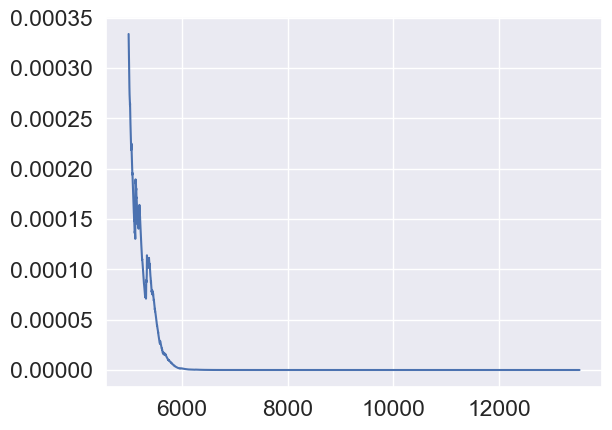

In [190]:
plt.plot(deviation)
# plt.plot(deviation2)